In [59]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.visualization import simple_norm
from astropy.wcs import WCS
from astropy.io import fits
import os
import glob
from astropy.table import Table


# Getting DRP Products from lvmvis

https://data.sdss5.org/lvmvis/?exposure=7332

sdss data access via the standard SAS data access password


Demo half-way through this telecon recording: 
https://utexas.zoom.us/rec/share/5xxKi-qdmazqOk77NA3UdpcxAPlwqmNlFhdjPIPLdT4KYo8gliVo9UEaTctZ4-_f.QqTk9BpH767S-QBB


DRP directories on the SAS: 
 https://data.sdss5.org/sas/sdsswork/lvm/spectro/redux/

# Getting DRP Products directly from the SAS

In [1]:
from sdss_access  import Access
# https://sdss-access.readthedocs.io/en/latest/auth.html

def download_drp_product(drpver, tileid, mjd, expnum, channel=None, kind="SFrame"):
    """Download LVM DRP products: lvmFrame, lvmFFrame, lvmCFrame, lvmSFrame

    Parameters
    ----------
    drpver : str
        DRP version (e.g., '1.0.3')
    tileid : int, str
        Tile ID (e.g., 11111)
    mjd : int, str
        MJD of the observation (e.g., 60275)
    expnum : int, str
        exposure number (e.g., 8432)
    channel : str, optional
        spectrograph channel (e.g., 'b', 'r', 'z')
    kind : str, optional
        LVM DRP product kind/species ('CFrame', 'SFrame'), by default 'SFrame'
    """
    if kind in ["Frame", "FFrame"]:
        kind = f"{kind}-{channel}" if channel in "brz" else f"{kind}-?"
    
    a = Access(release='sdsswork')
    try:
        a.remote()
        a.add('lvm_frame', drpver=drpver, mjd=mjd, tileid=tileid, expnum=expnum, kind=kind)
        a.set_stream()
        a.commit()
        print(f"downloaded product of {kind} for {mjd} - {expnum}")
#        log.info(f"downloaded product of {kind} for {mjd} - {expnum}")
    except Exception as e:
        print(f"error while downloading product of {kind} for {mjd} - {expnum}: {e}")
#        log.error(f"error while downloading product of {kind} for {mjd} - {expnum}: {e}")


In [ ]:
download_drp_product(drpver="1.0.3", tileid=1028893, mjd=60255, expnum=7332, kind="SFrame")

# Look at individual spectra

In [48]:
# where is the data stored? 
path = os.getcwd()
# if you used sdss_access then it is in the SAS_BASE_DIR
# path = os.environ['SAS_BASE_DIR']

expnum=7332

basename='lvmSFrame-NAME.fits'
sframe_path = glob.glob(path+'/**/'+basename.replace('NAME',f'{expnum:08}'),recursive=True)[0]


In [55]:
fits.info(sframe_path)


Filename: /Users/kreckel/research/SDSSV/DRP/sas/sdsswork/lvm/spectro/redux/1.0.3/1028XX/1028893/60255/lvmSFrame-00007332.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     447   ()      
  1  FLUX          1 ImageHDU        22   (12401, 1944)   float32   
  2  IVAR          1 ImageHDU        19   (12401, 1944)   float32   
  3  MASK          1 ImageHDU        19   (12401, 1944)   uint8   
  4  WAVE          1 ImageHDU        18   (12401,)   float64   
  5  LSF           1 ImageHDU        19   (12401, 1944)   float32   
  6  SKY           1 ImageHDU        19   (12401, 1944)   float32   
  7  SKY_IVAR      1 ImageHDU        20   (12401, 1944)   float32   
  8  SLITMAP       1 BinTableHDU     51   1944R x 21C   [K, K, 3A, K, 8A, 5A, K, 4A, D, D, D, 6A, 8A, K, 17A, K, K, K, K, D, D]   


In [ ]:
# Read the data into some variables
sframe = fits.open(sframe_path)
header0 = sframe[0].header
fibermap = sframe['SLITMAP'].data
[rss,header] = fits.getdata(sframe_path,'FLUX', header=True)

wcs = WCS(header)

In [60]:
Table(fibermap)

fiberid,spectrographid,blockid,finblock,targettype,ifulabel,finifu,telescope,xpmm,ypmm,ringnum,orig_ifulabel,orig_slitlabel,finsector,fmap,ypix_b,ypix_r,ypix_z,fibstatus,ra,dec
int64,int64,str3,int64,str8,str5,int64,str4,float64,float64,float64,str6,str8,int64,str17,int64,int64,int64,int64,float64,float64
1,1,B1,1,SKY,SkyW3,1,SkyW,0.0,0.0,1.0,A3-1,S1B1-1,1,SkyW3-1:S1B1-1,4004,4015,4012,0,85.80027393321654,-1.2740378114047815
2,1,B1,2,standard,Spec1,135,Spec,1.429,5.115,19.0,P1-1,S1B1-2,1,Spec1-1:S1B1-2,3998,4010,4007,0,0.04460363918612728,-0.1596550041287928
3,1,B1,3,science,Sci1,1,Sci,0.0,7.92,25.0,S1-1,S1B1-3,1,Sci1-1:S1B1-3,3993,4004,4001,0,85.17485315644613,-2.4252066339009093
4,1,B1,4,science,Sci1,2,Sci,0.286,7.755,25.0,S1-2,S1B1-4,2,Sci1-2:S1B1-4,3987,3999,3995,0,85.18358313052146,-2.4306963593040303
5,1,B1,5,science,Sci1,3,Sci,0.572,7.59,25.0,S1-3,S1B1-5,3,Sci1-3:S1B1-5,3981,3993,3990,0,85.1923131818165,-2.436186032246999
6,1,B1,6,science,Sci1,4,Sci,0.857,7.425,25.0,S1-4,S1B1-6,4,Sci1-4:S1B1-6,3976,3987,3984,0,85.20102872342167,-2.4416480503105116
7,1,B1,7,science,Sci1,5,Sci,1.143,7.26,25.0,S1-5,S1B1-7,5,Sci1-5:S1B1-7,3970,3982,3978,0,85.20975892770258,-2.4471376169721655
8,1,B1,8,science,Sci1,6,Sci,1.429,7.095,25.0,S1-6,S1B1-8,6,Sci1-6:S1B1-8,3965,3976,3973,0,85.21848920799084,-2.4526271297255025
9,1,B1,9,science,Sci1,7,Sci,1.715,6.93,25.0,S1-7,S1B1-9,7,Sci1-7:S1B1-9,3959,3971,3967,0,85.22721956388204,-2.458116588087336


In [64]:
header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2                                                  
NAXIS1  =                12401                                                  
NAXIS2  =                 1944                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
BUNIT   = 'ergs/s/cm^2/A'      / flux units                                     
EXTNAME = 'FLUX    '           / extension name                                 
BSCALE  =                  1.0                                                  
BZERO   =                    0                                                  
CDELT1  =                  0.5                                                  
CRVAL1  =               3600

In [70]:
# select only the science telescope fibers
#sci_tel = (fibermap["telescope"]=="Sci")

# select only good science telescope fibers
sci_tel = (fibermap["telescope"]=="Sci") & (fibermap["fibstatus"]==0)


# the spectra from the science telescope:
flux = rss[sci_tel]

# the position mapping for those fibers:
ra = fibermap["ra"][sci_tel]
dec = fibermap["dec"][sci_tel]

# the unified wavelength solution for these spectra:
wave = sframe['wave'].data


Text(0, 0.5, 'Flux [ergs/s/cm^2/A/fiber]')

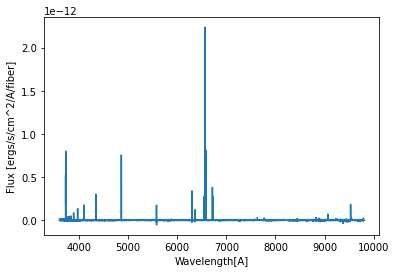

In [69]:
# pick a fiber to plot
which_fiber = 0

plt.plot(wave,flux[which_fiber,:])
plt.xlabel('Wavelength[A]')
plt.ylabel('Flux [ergs/s/cm^2/A/fiber]')

(6520.0, 6600.0)

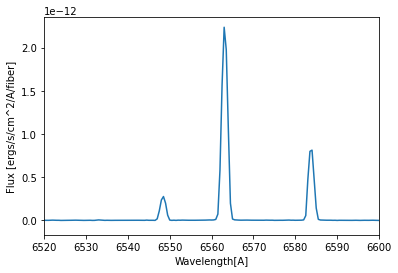

In [68]:
plt.plot(wave,flux[0,:])
plt.xlabel('Wavelength[A]')
plt.ylabel('Flux [ergs/s/cm^2/A/fiber]')
plt.xlim(6520,6600)

# Viewing slices of the data/fiber distribution


In [52]:
def lvm_map(path, expnum, lines):
    basename='lvmSFrame-NAME.fits'
    sframe_path = glob.glob(path+'/**/'+basename.replace('NAME',f'{expnum:08}'),recursive=True)[0]

    sframe = fits.open(sframe_path)
    header0 = sframe[0].header
    fibermap = sframe['SLITMAP'].data
    [rss,header] = fits.getdata(sframe_path,'FLUX', header=True)

    wcs = WCS(header)

    sci_tel = (fibermap["telescope"]=="Sci")
    flux = rss[sci_tel]
    x = fibermap["ra"][sci_tel]
    y = fibermap["dec"][sci_tel]
    wave = sframe['wave'].data

    print(f"maps for {sframe_path}, around lines:")
    
    ncols = len(lines)
    nrows = max(1, ncols // 3)
    fig, axs = plt.subplots(nrows, ncols, figsize=(7*ncols,8), sharex=True, sharey=True)#, layout="constrained", subplot_kw=dict(projection=wcs))
    plt.gca().invert_xaxis()
    fig.suptitle(f"maps for {expnum}")
    axs = axs.flatten()
    for i, (ename, (ewave, ewidth)) in enumerate(lines.items()):
        print(f"    - {ename}{int(ewave)}")
        mask = (ewave-ewidth <= wave)&(wave <= ewave+ewidth)
        z = np.nanmean(flux[:, mask], axis=1)
        norm = simple_norm(z, stretch="sqrt", min_percent=1, max_percent=99)
        axs[i].set_title(f"{ename}{int(ewave)}")
        axs[i].scatter(x, y, s=120, lw=0, c=z, marker=(6, 0, 90-header0["POSCIPA"]), cmap="magma", norm=norm)
    fig.supxlabel("RA (deg)")
    fig.supylabel("Dec (deg)")

[WARNING]: Mean of empty slice (RuntimeWarning)


maps for /Users/kreckel/research/SDSSV/LVM_tutorial/lvmSFrame-00007332.fits, around lines:
    - OIII5007
    - Halpha6563


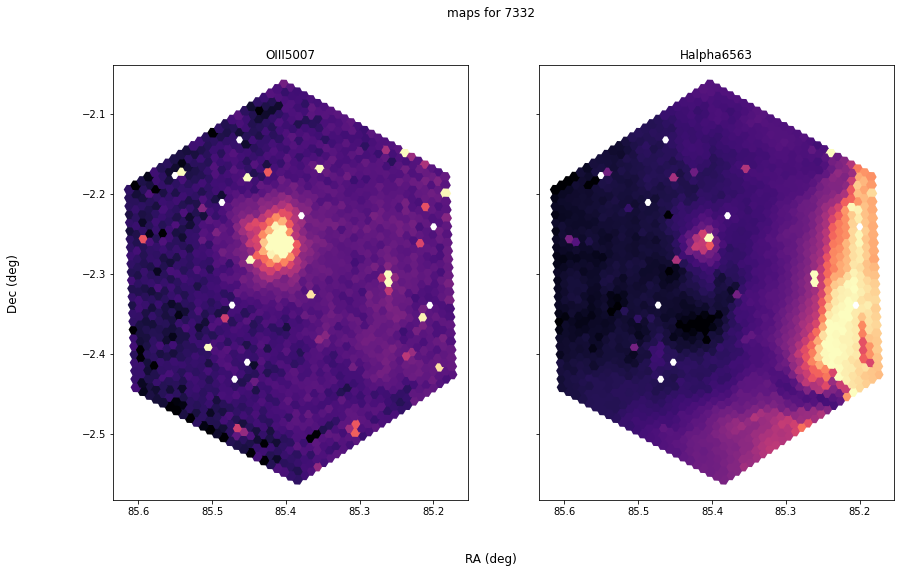

In [71]:
# select some interesting lines
lines = {"OIII": (5007, 5), "Halpha": (6563, 10)}
# draw maps for those lines using Guillermo/Kathryn's map tools

path = os.getcwd()
#path = os.environ['SAS_BASE_DIR']
expnum=7332

lvm_map(path=path, expnum=expnum, lines=lines)